In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import stats

In [2]:
baselines = ['baseline_lowest', 'baseline_highest', 'baseline_random', 'baseline_greedy', 'greedy_highest']
baseline_results = {}

# Plots

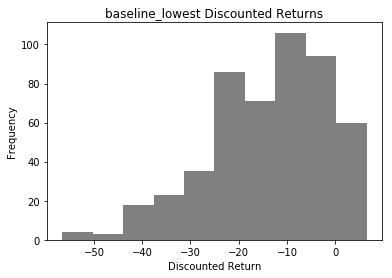

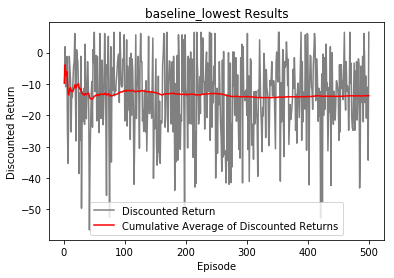

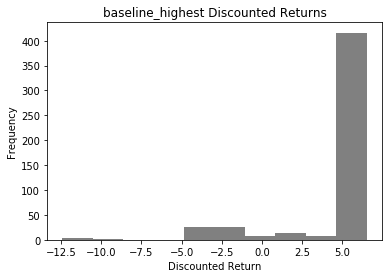

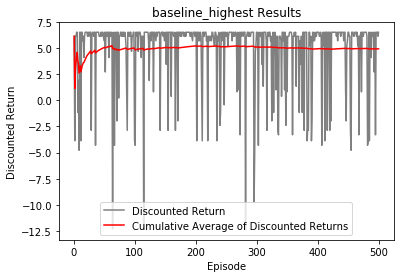

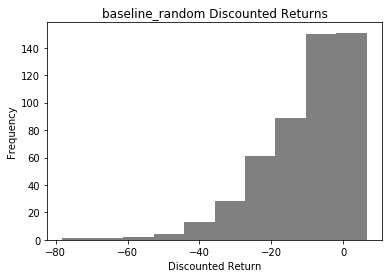

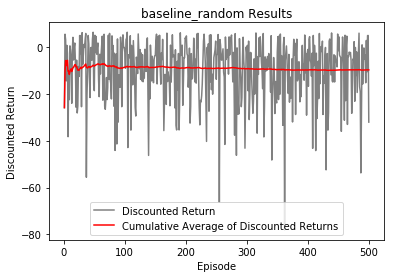

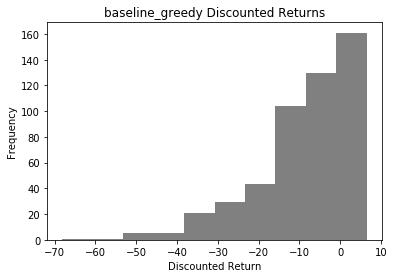

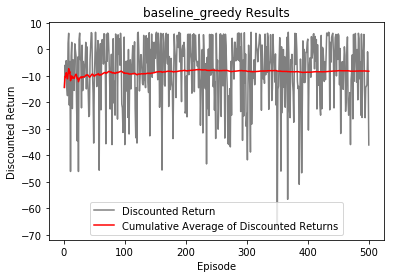

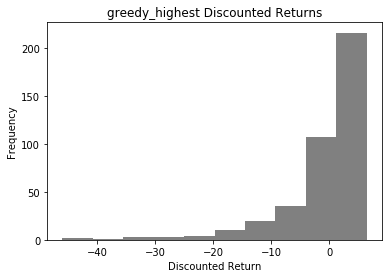

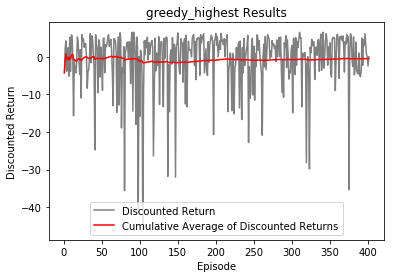

In [3]:
for baseline in baselines:
    data = pd.read_csv(os.path.join(baseline, 'results.txt'))
    baseline_results[baseline] = data
    plt.figure()
    plt.hist(data.discountedReturn, color='gray')
    plt.xlabel('Discounted Return')
    plt.ylabel('Frequency')
    plt.title('{} Discounted Returns'.format(baseline))
    plt.figure()
    plt.plot(data.episode, data.discountedReturn, 'gray', label='Discounted Return')
    plt.plot(data.episode, data.averageDiscountedReturn, 'red', label='Cumulative Average of Discounted Returns')
    plt.legend(loc='lower center')
    plt.xlabel('Episode')
    plt.ylabel('Discounted Return')
    plt.title('{} Results'.format(baseline))

# Averages

In [4]:
episode_length = 500
for baseline in baselines:
    print('Average discounted rewards over {} episodes of {}: {}'.format(episode_length, baseline, baseline_results[baseline].averageDiscountedReturn.iloc[-1]))

Average discounted rewards over 500 episodes of baseline_lowest: -13.750564179100001
Average discounted rewards over 500 episodes of baseline_highest: 4.9264054769
Average discounted rewards over 500 episodes of baseline_random: -9.60174937874
Average discounted rewards over 500 episodes of baseline_greedy: -8.19520807997
Average discounted rewards over 500 episodes of greedy_highest: -0.49938172963


## Statistical Tests

In [5]:
stats.ttest_ind(baseline_results['baseline_random'].discountedReturn, baseline_results['baseline_greedy'].discountedReturn, equal_var=False)

Ttest_indResult(statistic=-1.7342930636340175, pvalue=0.08317521155163055)

In [6]:
stats.ttest_ind(baseline_results['baseline_random'].discountedReturn.iloc[:250], baseline_results['baseline_greedy'].discountedReturn.iloc[:250], equal_var=False)

Ttest_indResult(statistic=-0.9059016302382972, pvalue=0.3654260022909359)

In [7]:
stats.ttest_ind(baseline_results['baseline_lowest'].discountedReturn, baseline_results['baseline_greedy'].discountedReturn, equal_var=False)

Ttest_indResult(statistic=-6.958464696531238, pvalue=6.2209568259324114e-12)

In [8]:
stats.ttest_ind(baseline_results['baseline_lowest'].discountedReturn, baseline_results['baseline_random'].discountedReturn, equal_var=False)

Ttest_indResult(statistic=-5.110439112577001, pvalue=3.8511897148371275e-07)

In [9]:
stats.ttest_ind(baseline_results['baseline_lowest'].discountedReturn, baseline_results['greedy_highest'].discountedReturn, equal_var=False)

Ttest_indResult(statistic=-19.39243709804818, pvalue=1.5050917589237384e-69)

In [10]:
stats.ttest_ind(baseline_results['baseline_random'].discountedReturn, baseline_results['greedy_highest'].discountedReturn, equal_var=False)

Ttest_indResult(statistic=-13.039449838771755, pvalue=1.7108775653187924e-35)

In [11]:
stats.ttest_ind(baseline_results['baseline_greedy'].discountedReturn, baseline_results['greedy_highest'].discountedReturn, equal_var=False)

Ttest_indResult(statistic=-11.27842493835054, pvalue=1.4136035025869713e-27)